<a href="https://colab.research.google.com/github/ehsan94/Deep-Learning/blob/master/Deutschland_COVID19_SHAP_0to75.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Total: 75-91

In [ ]:
#%pip install shap
#%matplotlib inline
#%pip install catboost

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from matplotlib import rcParams
import shap

from catboost import Pool, CatBoostRegressor

# Data

In [2]:
df = pd.read_stata('W:\COVID19\std_inz75_91.dta')


One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.


In [3]:
#df.head()

In [26]:
Y = df['std_inz_75to91']
X = df.loc[:, ~df.columns.isin(['std_inz_75to91', 'eastwest'])]
print("Number of features: ", len(X.columns))

Number of features:  163


# RF model

In [20]:
rfr = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)
rf=rfr.fit(X, Y)  

# R2 RF model

In [21]:
rf.score(X, Y)

0.9242461926610275

# CatBoost Model

In [5]:
# initialize Pool
train_pool = Pool(X,Y)
 

# specify the training parameters 
model = CatBoostRegressor(random_seed=0)
#train the model
cb = model.fit(train_pool)

# prediction
preds = cb.predict(train_pool,
                    prediction_type="RawFormulaVal"
                  )
#print(Y.dtype)
preds = preds.reshape(-1, 1)
#print(preds)
from sklearn.linear_model import LinearRegression
from sklearn import metrics
reg = LinearRegression().fit(preds, Y)
print("R2 linReg_model: ", reg.score(preds, Y))
print("RMSE linReg_model: ",metrics.mean_squared_error(preds, Y))

Learning rate set to 0.033171
0:	learn: 63.2684553	total: 151ms	remaining: 2m 31s
1:	learn: 62.6426577	total: 158ms	remaining: 1m 18s
2:	learn: 61.9593927	total: 164ms	remaining: 54.5s
3:	learn: 61.2708207	total: 170ms	remaining: 42.4s
4:	learn: 60.6642890	total: 177ms	remaining: 35.1s
5:	learn: 60.0517520	total: 183ms	remaining: 30.3s
6:	learn: 59.4655317	total: 189ms	remaining: 26.8s
7:	learn: 58.9360813	total: 196ms	remaining: 24.4s
8:	learn: 58.3202296	total: 203ms	remaining: 22.4s
9:	learn: 57.6616642	total: 210ms	remaining: 20.8s
10:	learn: 57.0959355	total: 217ms	remaining: 19.5s
11:	learn: 56.5393118	total: 224ms	remaining: 18.4s
12:	learn: 55.9304121	total: 230ms	remaining: 17.5s
13:	learn: 55.4449472	total: 236ms	remaining: 16.6s
14:	learn: 55.0106435	total: 243ms	remaining: 15.9s
15:	learn: 54.5177893	total: 249ms	remaining: 15.3s
16:	learn: 53.9654260	total: 255ms	remaining: 14.7s
17:	learn: 53.5285107	total: 261ms	remaining: 14.2s
18:	learn: 53.1062910	total: 267ms	remaini

184:	learn: 23.1225469	total: 1.28s	remaining: 5.66s
185:	learn: 22.9576212	total: 1.29s	remaining: 5.65s
186:	learn: 22.8916588	total: 1.3s	remaining: 5.64s
187:	learn: 22.8149671	total: 1.3s	remaining: 5.63s
188:	learn: 22.7318918	total: 1.31s	remaining: 5.62s
189:	learn: 22.7006148	total: 1.32s	remaining: 5.61s
190:	learn: 22.6466662	total: 1.32s	remaining: 5.6s
191:	learn: 22.5466707	total: 1.33s	remaining: 5.59s
192:	learn: 22.4737354	total: 1.33s	remaining: 5.58s
193:	learn: 22.4107816	total: 1.34s	remaining: 5.57s
194:	learn: 22.3776894	total: 1.35s	remaining: 5.56s
195:	learn: 22.2443376	total: 1.35s	remaining: 5.55s
196:	learn: 22.2085127	total: 1.36s	remaining: 5.54s
197:	learn: 22.1751378	total: 1.36s	remaining: 5.53s
198:	learn: 22.0899387	total: 1.37s	remaining: 5.52s
199:	learn: 22.0074377	total: 1.38s	remaining: 5.51s
200:	learn: 21.9223353	total: 1.38s	remaining: 5.5s
201:	learn: 21.8563561	total: 1.39s	remaining: 5.49s
202:	learn: 21.7137770	total: 1.4s	remaining: 5.48

363:	learn: 11.9431063	total: 2.39s	remaining: 4.17s
364:	learn: 11.9350543	total: 2.39s	remaining: 4.16s
365:	learn: 11.9089027	total: 2.4s	remaining: 4.16s
366:	learn: 11.8916661	total: 2.4s	remaining: 4.15s
367:	learn: 11.8580127	total: 2.41s	remaining: 4.14s
368:	learn: 11.7769426	total: 2.42s	remaining: 4.14s
369:	learn: 11.7055459	total: 2.43s	remaining: 4.13s
370:	learn: 11.6982275	total: 2.43s	remaining: 4.12s
371:	learn: 11.6451457	total: 2.44s	remaining: 4.12s
372:	learn: 11.6356537	total: 2.44s	remaining: 4.11s
373:	learn: 11.6272245	total: 2.45s	remaining: 4.1s
374:	learn: 11.5632798	total: 2.46s	remaining: 4.1s
375:	learn: 11.5159725	total: 2.46s	remaining: 4.09s
376:	learn: 11.4679970	total: 2.47s	remaining: 4.08s
377:	learn: 11.4271996	total: 2.48s	remaining: 4.08s
378:	learn: 11.4177852	total: 2.48s	remaining: 4.07s
379:	learn: 11.3711480	total: 2.49s	remaining: 4.06s
380:	learn: 11.3642623	total: 2.49s	remaining: 4.05s
381:	learn: 11.3253140	total: 2.5s	remaining: 4.04

533:	learn: 6.5756860	total: 3.46s	remaining: 3.02s
534:	learn: 6.5688635	total: 3.46s	remaining: 3.01s
535:	learn: 6.5562870	total: 3.47s	remaining: 3s
536:	learn: 6.5272163	total: 3.48s	remaining: 3s
537:	learn: 6.5035419	total: 3.48s	remaining: 2.99s
538:	learn: 6.4827596	total: 3.49s	remaining: 2.98s
539:	learn: 6.4574134	total: 3.49s	remaining: 2.98s
540:	learn: 6.4286100	total: 3.5s	remaining: 2.97s
541:	learn: 6.3999738	total: 3.51s	remaining: 2.96s
542:	learn: 6.3724298	total: 3.51s	remaining: 2.96s
543:	learn: 6.3444472	total: 3.52s	remaining: 2.95s
544:	learn: 6.3228307	total: 3.53s	remaining: 2.94s
545:	learn: 6.3010595	total: 3.53s	remaining: 2.94s
546:	learn: 6.2831501	total: 3.54s	remaining: 2.93s
547:	learn: 6.2601704	total: 3.55s	remaining: 2.92s
548:	learn: 6.2417500	total: 3.55s	remaining: 2.92s
549:	learn: 6.2243836	total: 3.56s	remaining: 2.91s
550:	learn: 6.2204805	total: 3.56s	remaining: 2.9s
551:	learn: 6.1959943	total: 3.57s	remaining: 2.9s
552:	learn: 6.1721856

704:	learn: 3.9330263	total: 4.53s	remaining: 1.9s
705:	learn: 3.9152492	total: 4.54s	remaining: 1.89s
706:	learn: 3.8969252	total: 4.54s	remaining: 1.88s
707:	learn: 3.8923719	total: 4.55s	remaining: 1.88s
708:	learn: 3.8706084	total: 4.55s	remaining: 1.87s
709:	learn: 3.8553355	total: 4.56s	remaining: 1.86s
710:	learn: 3.8373831	total: 4.57s	remaining: 1.86s
711:	learn: 3.8328505	total: 4.57s	remaining: 1.85s
712:	learn: 3.8303436	total: 4.58s	remaining: 1.84s
713:	learn: 3.8273689	total: 4.59s	remaining: 1.84s
714:	learn: 3.8170181	total: 4.59s	remaining: 1.83s
715:	learn: 3.7960726	total: 4.6s	remaining: 1.82s
716:	learn: 3.7841134	total: 4.6s	remaining: 1.82s
717:	learn: 3.7684705	total: 4.61s	remaining: 1.81s
718:	learn: 3.7639608	total: 4.62s	remaining: 1.8s
719:	learn: 3.7469976	total: 4.62s	remaining: 1.8s
720:	learn: 3.7457399	total: 4.63s	remaining: 1.79s
721:	learn: 3.7444122	total: 4.63s	remaining: 1.78s
722:	learn: 3.7307803	total: 4.64s	remaining: 1.78s
723:	learn: 3.713

874:	learn: 2.3212361	total: 5.61s	remaining: 801ms
875:	learn: 2.3115728	total: 5.62s	remaining: 795ms
876:	learn: 2.2988032	total: 5.62s	remaining: 789ms
877:	learn: 2.2977350	total: 5.63s	remaining: 782ms
878:	learn: 2.2955887	total: 5.64s	remaining: 776ms
879:	learn: 2.2869531	total: 5.64s	remaining: 769ms
880:	learn: 2.2800093	total: 5.65s	remaining: 763ms
881:	learn: 2.2712034	total: 5.66s	remaining: 757ms
882:	learn: 2.2695169	total: 5.66s	remaining: 750ms
883:	learn: 2.2597120	total: 5.67s	remaining: 744ms
884:	learn: 2.2497380	total: 5.67s	remaining: 737ms
885:	learn: 2.2399175	total: 5.68s	remaining: 731ms
886:	learn: 2.2355343	total: 5.69s	remaining: 725ms
887:	learn: 2.2347175	total: 5.69s	remaining: 718ms
888:	learn: 2.2259647	total: 5.7s	remaining: 712ms
889:	learn: 2.2164390	total: 5.71s	remaining: 705ms
890:	learn: 2.2111464	total: 5.71s	remaining: 699ms
891:	learn: 2.2022442	total: 5.72s	remaining: 692ms
892:	learn: 2.1907985	total: 5.72s	remaining: 686ms
893:	learn: 2

# R2 CatBoost

In [6]:
cb.score(X, Y)

0.99941318226255

# SHAP values 

# RF

In [22]:
shap_values = shap.TreeExplainer(rf).shap_values(X)

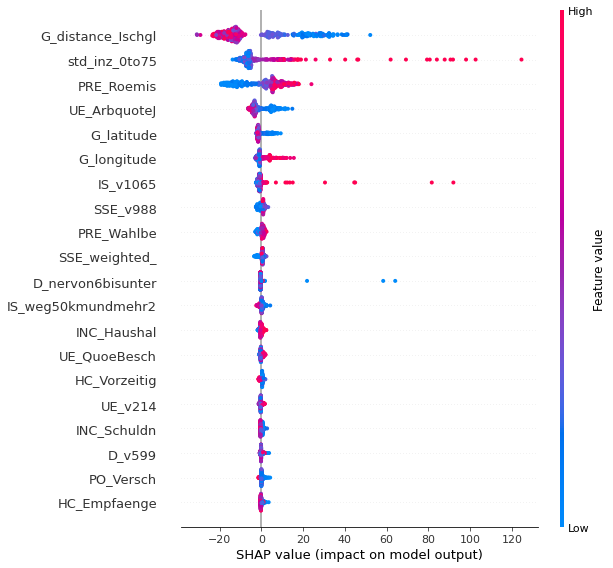

In [23]:
shap.summary_plot(shap_values, X,max_display=20) 

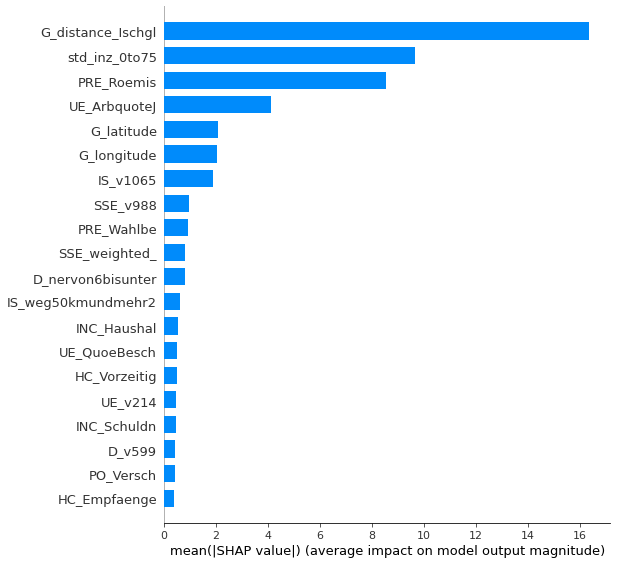

In [24]:
shap.summary_plot(shap_values, X, plot_type="bar",max_display=20)

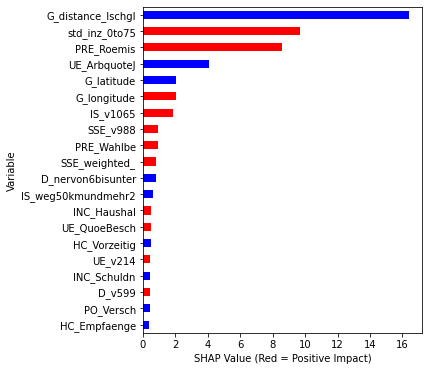

In [25]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    k2 = k2[-20:]
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
ABS_SHAP(shap_values,X) 

# CatBoost

In [7]:
shap_values_cb = shap.TreeExplainer(cb).shap_values(X)

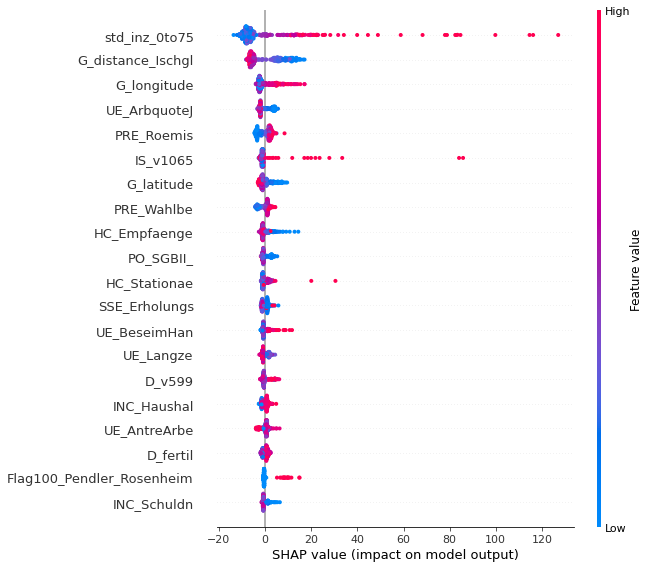

In [8]:
shap.summary_plot(shap_values_cb, X,max_display=20)  #TreeExpliner

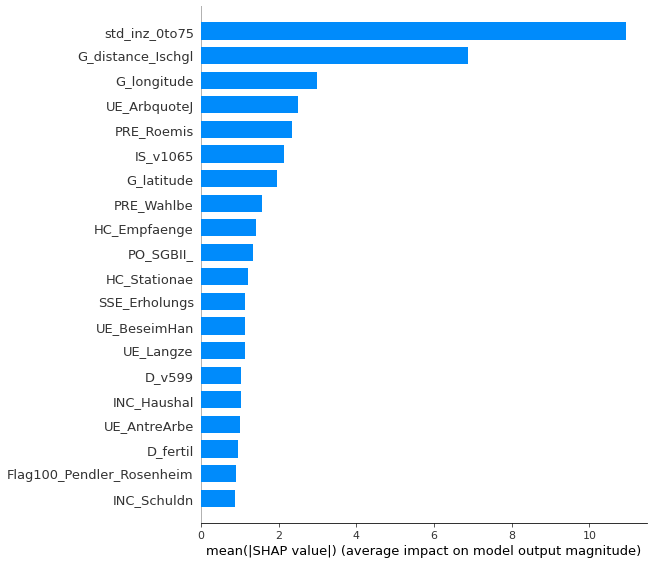

In [9]:
shap.summary_plot(shap_values_cb, X, plot_type="bar",max_display=20)

invalid value encountered in true_divide
invalid value encountered in true_divide


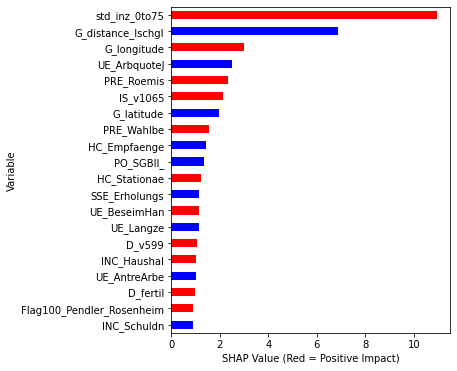

In [10]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    k2 = k2[-20:]
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
ABS_SHAP(shap_values_cb,X) 

# CatBoost 20 most important vars

In [11]:
f = len(X.columns)
l = f-21
ll = f-11


In [12]:
top20feature = X.columns[np.argsort(np.abs(shap_values_cb).mean(0))][f:l:-1]
top10feature = X.columns[np.argsort(np.abs(shap_values_cb).mean(0))][f:ll:-1]

X[top20feature].describe()

,std_inz_0to75,G_distance_Ischgl,G_longitude,UE_ArbquoteJ,PRE_Roemis,IS_v1065,G_latitude,PRE_Wahlbe,HC_Empfaenge,PO_SGBII_,HC_Stationae,SSE_Erholungs,UE_BeseimHan,UE_Langze,D_v599,INC_Haushal,UE_AntreArbe,D_fertil,Flag100_Pendler_Rosenheim,INC_Schuldn
count,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000
mean,7.706820,431.346405,9.866996,5.259102,32.242809,21.925186,50.615292,75.075867,50.857368,8.995763,24.358610,70.509460,13.988770,32.202751,23.700602,1591.685791,9.834411,1.632219,0.047382,9.687282
std,14.427098,187.236847,2.026269,2.706737,24.361435,15.378859,1.740311,3.794014,6.518343,4.146994,5.373881,56.734707,4.891640,8.077894,0.656121,589.468872,2.016845,0.134031,0.212719,2.725502
min,0.000000,56.052784,6.083333,1.400000,1.700000,0.000000,47.500000,63.099998,28.600000,2.200000,11.100000,14.000000,0.000000,10.500000,22.020000,2.000000,3.000000,1.060000,0.000000,3.700000
25%,2.452555,291.752441,8.216666,2.900000,7.900000,13.000000,49.283333,72.699997,46.400002,5.800000,20.400000,39.700001,10.600000,25.600000,23.270000,1591.000000,8.600000,1.560000,0.000000,7.700000
50%,5.019764,420.680756,9.766666,4.900000,29.100000,21.000000,50.549999,75.300003,51.099998,8.500000,23.700001,52.799999,13.900000,32.700001,23.680000,1764.000000,10.200000,1.650000,0.000000,9.400000
75%,9.171128,569.178772,11.416667,6.600000,52.299999,32.000000,51.849998,77.599998,55.599998,11.100000,27.500000,76.699997,16.900000,38.500000,24.180000,1904.000000,11.200000,1.720000,0.000000,11.000000
max,259.999207,866.911194,14.983334,16.500000,87.800003,79.000000,54.783333,84.099998,66.699997,23.799999,43.299999,384.600006,47.700001,53.400002,25.719999,2904.000000,14.800000,1.940000,1.000000,20.799999


In [13]:
# initialize Pool
train_pool20 = Pool(data=X[top20feature],
                  label=Y,
                 feature_names = list(X[top20feature].columns))
 

# specify the training parameters 
model20 = CatBoostRegressor(random_seed=0,
                          logging_level="Silent"
                         )
#train the model
cb20 = model20.fit(train_pool20)

In [14]:
# prediction
preds20 = cb20.predict(train_pool20,
                    prediction_type="RawFormulaVal"
                  )
#print(Y.dtype)
preds20 = preds20.reshape(-1, 1)
#print(preds20)
from sklearn.linear_model import LinearRegression
from sklearn import metrics
reg20 = LinearRegression().fit(preds20, Y)
print("R2 linReg_model20: ", reg.score(preds20, Y))
print("RMSE linReg_model20: ",metrics.mean_squared_error(preds20, Y))


R2 linReg_model20:  0.9970864123632766
RMSE linReg_model20:  12.823619018380262


# R2 CatBoost top20

In [15]:
cb20.score(X[top20feature], Y)

0.9968733955612183

# cross validation

In [16]:
# all
import random
iterations = range(0,40)
r2_reg_k_test = list(range(0,40))
rmse_reg_k_test = list(range(0,40))
r2_cb_k_train = list(range(0,40))
r2_cb_k_test = list(range(0,40))
for i in iterations:
    rs = random.sample(range(0,401), 100)
    k_test_x = X.iloc[rs]
    k_test_y = Y.iloc[rs]
    k_train_x = X.drop(rs)
    k_train_y = Y.drop(rs)
    # initialize Pool 
    train_pool_k = Pool(data=k_train_x,
                        label=k_train_y,
                        feature_names = list(X.columns))
        
    test_pool_k = Pool(data=k_test_x,
                       label=k_test_y,
                       feature_names = list(X.columns))
 
    model = CatBoostRegressor(random_seed=0, logging_level="Silent")
    #train the model
    cb_k = model.fit(train_pool_k)
    # make the prediction using the resulting model
    preds_k = cb_k.predict(test_pool_k,
                    prediction_type="RawFormulaVal"
                  )
    preds_k = preds_k.reshape(-1, 1)
    #LinearRegression
    from sklearn.linear_model import LinearRegression
    from sklearn import metrics
    reg_k = LinearRegression().fit(preds_k, k_test_y)
    print(i/len(iterations)*100, "% done; "," R2_reg_test:",reg_k.score(preds_k, k_test_y)) 
    #print("RMSE",metrics.mean_squared_error(preds_k, k_test_y)) 
    #print("R2_cb_train:",cb_k.score(train_pool_k)) 
    #print("R2_cb_test:",cb_k.score(test_pool_k))
    
    r2_reg_k_test[i] = reg_k.score(preds_k, k_test_y)
    rmse_reg_k_test[i] = metrics.mean_squared_error(preds_k, k_test_y)
    r2_cb_k_train[i] = cb_k.score(train_pool_k)
    r2_cb_k_test[i] =  cb_k.score(test_pool_k)

0.0 % done;   R2_reg_test: 0.4086377065723076
2.5 % done;   R2_reg_test: 0.44983948427374476
5.0 % done;   R2_reg_test: 0.6270410121129374
7.5 % done;   R2_reg_test: 0.4457045422564655
10.0 % done;   R2_reg_test: 0.397683586594216
12.5 % done;   R2_reg_test: 0.3345690838805443
15.0 % done;   R2_reg_test: 0.559241983622272
17.5 % done;   R2_reg_test: 0.45882762403644706
20.0 % done;   R2_reg_test: 0.5943509293048346
22.5 % done;   R2_reg_test: 0.526645303282576
25.0 % done;   R2_reg_test: 0.6133125332926763
27.500000000000004 % done;   R2_reg_test: 0.3734529494707195
30.0 % done;   R2_reg_test: 0.5515154558118657
32.5 % done;   R2_reg_test: 0.3969356367039961
35.0 % done;   R2_reg_test: 0.3591875001895949
37.5 % done;   R2_reg_test: 0.4300613567021975
40.0 % done;   R2_reg_test: 0.5725253028731789
42.5 % done;   R2_reg_test: 0.44496774604358413
45.0 % done;   R2_reg_test: 0.5556318125373854
47.5 % done;   R2_reg_test: 0.5186840411042424
50.0 % done;   R2_reg_test: 0.5845424116768692
52.

In [17]:
print("Mean R2 of linReg_modesl: ", sum(r2_reg_k_test)/len(r2_reg_k_test))
print("Mean R2 of CatBoost_models:",sum(r2_cb_k_train)/len(r2_cb_k_train))

Mean R2 of linReg_modesl:  0.4980947367481419
Mean R2 of CatBoost_models: 0.9997896394495607


In [18]:
import random
iterations = range(0,40)
r2_reg_k_test = list(range(0,40))
rmse_reg_k_test = list(range(0,40))
r2_cb_k_train = list(range(0,40))
r2_cb_k_test = list(range(0,40))
for i in iterations:
    rs = random.sample(range(0,401), 100)
    k_test_x = X[top20feature].iloc[rs]
    k_test_y = Y.iloc[rs]
    k_train_x = X[top20feature].drop(rs)
    k_train_y = Y.drop(rs)
    # initialize Pool 
    train_pool_k = Pool(data=k_train_x,
                        label=k_train_y,
                        feature_names = list(X[top20feature].columns))
        
    test_pool_k = Pool(data=k_test_x,
                       label=k_test_y,
                       feature_names = list(X[top20feature].columns))
 
    model = CatBoostRegressor(random_seed=0, logging_level="Silent")
    #train the model
    cb_k = model.fit(train_pool_k)
    # make the prediction using the resulting model
    preds_k = cb_k.predict(test_pool_k,
                    prediction_type="RawFormulaVal"
                  )
    preds_k = preds_k.reshape(-1, 1)
    #LinearRegression
    from sklearn.linear_model import LinearRegression
    from sklearn import metrics
    reg_k = LinearRegression().fit(preds_k, k_test_y)
    print(i/len(iterations)*100, "% done; "," R2_reg_test:",reg_k.score(preds_k, k_test_y)) 
    #print("RMSE",metrics.mean_squared_error(preds_k, k_test_y)) 
    #print("R2_cb_train:",cb_k.score(train_pool_k)) 
    #print("R2_cb_test:",cb_k.score(test_pool_k))
    
    r2_reg_k_test[i] = reg_k.score(preds_k, k_test_y)
    rmse_reg_k_test[i] = metrics.mean_squared_error(preds_k, k_test_y)
    r2_cb_k_train[i] = cb_k.score(train_pool_k)
    r2_cb_k_test[i] =  cb_k.score(test_pool_k)

0.0 % done;   R2_reg_test: 0.52977343792607
2.5 % done;   R2_reg_test: 0.5544260148403223
5.0 % done;   R2_reg_test: 0.5804240691353078
7.5 % done;   R2_reg_test: 0.6527610325824926
10.0 % done;   R2_reg_test: 0.41663274739344525
12.5 % done;   R2_reg_test: 0.41427124487878886
15.0 % done;   R2_reg_test: 0.4573892951681994
17.5 % done;   R2_reg_test: 0.5481780025329663
20.0 % done;   R2_reg_test: 0.5592591482646398
22.5 % done;   R2_reg_test: 0.536457286518118
25.0 % done;   R2_reg_test: 0.47389444966469163
27.500000000000004 % done;   R2_reg_test: 0.6430921364587252
30.0 % done;   R2_reg_test: 0.4840752080311699
32.5 % done;   R2_reg_test: 0.663471013442962
35.0 % done;   R2_reg_test: 0.4793843364876901
37.5 % done;   R2_reg_test: 0.625507017831931
40.0 % done;   R2_reg_test: 0.5279051352947599
42.5 % done;   R2_reg_test: 0.4259613490283042
45.0 % done;   R2_reg_test: 0.6445425164141245
47.5 % done;   R2_reg_test: 0.4137441227283357
50.0 % done;   R2_reg_test: 0.5181650534046387
52.5 

In [19]:
print("Mean R2 of linReg_modesl: ", sum(r2_reg_k_test)/len(r2_reg_k_test))
print("Mean R2 of CatBoost_models:",sum(r2_cb_k_train)/len(r2_cb_k_train))

Mean R2 of linReg_modesl:  0.5355742010002555
Mean R2 of CatBoost_models: 0.9979743790656157
